<a href="https://colab.research.google.com/github/engmohamedsalah/AIMaster/blob/master/Building_an_AI_based_Application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Building an AI-based Application

# Task 1:

Load the provided CSV dataset (sample-superstore.csv) into Python and print the first ten records with the associated column names.

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [25]:
import matplotlib.pyplot as plt
df_super_store = pd.read_csv('sample-superstore 2023 T3.csv')

In [26]:
df_super_store.sample(10)


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7987,778,CA-2015-144267,21/08/2015,23/08/2015,First Class,NZ-18565,Nick Zandusky,Home Office,United States,San Francisco,...,94110,West,FUR-CH-10002335,Furniture,Chairs,Hon GuestStacker Chair,544.008,3,0.2,40.8006
4633,1088,CA-2016-166163,15/08/2016,20/08/2016,Second Class,CY-12745,Craig Yedwab,Corporate,United States,Oakland,...,94601,West,TEC-PH-10004896,Technology,Phones,Nokia Lumia 521 (T-Mobile),71.976,3,0.2,7.1976
3892,868,CA-2016-134362,29/09/2016,10/02/2016,First Class,LS-16945,Linda Southworth,Corporate,United States,Philadelphia,...,19140,East,OFF-LA-10004853,Office Supplies,Labels,Avery 483,15.936,4,0.2,5.1792
2946,306,CA-2014-130960,30/12/2014,01/04/2015,Standard Class,KB-16600,Ken Brennan,Corporate,United States,Taylor,...,48180,Central,OFF-AR-10003651,Office Supplies,Art,Newell 350,9.840,3,0.0,2.8536
4329,2986,CA-2016-139269,25/05/2016,30/05/2016,Standard Class,JB-16045,Julia Barnett,Home Office,United States,Columbus,...,31907,South,FUR-FU-10000755,Furniture,Furnishings,Eldon Expressions Mahogany Wood Desk Collection,24.960,4,0.0,6.24
569,1878,CA-2017-118885,29/12/2017,01/02/2018,Standard Class,JG-15160,James Galang,Consumer,United States,Los Angeles,...,90049,West,FUR-CH-10002880,Furniture,Chairs,"Global High-Back Leather Tilter, Burgundy",393.568,4,0.2,-44.2764
1712,1214,US-2017-118087,09/09/2017,13/09/2017,Standard Class,SP-20620,Stefania Perrino,Corporate,United States,Philadelphia,...,19134,East,OFF-BI-10002432,Office Supplies,Binders,Wilson Jones Standard D-Ring Binders,3.036,2,0.7,-2.3276
9016,9745,CA-2017-141782,21/01/2017,25/01/2017,Standard Class,BE-11410,Bobby Elias,Consumer,United States,Aurora,...,60505,Central,OFF-EN-10002230,Office Supplies,Envelopes,Airmail Envelopes,268.576,4,0.2,90.6444
1786,7178,CA-2017-133067,05/04/2017,05/10/2017,Standard Class,MY-18295,Muhammed Yedwab,Corporate,United States,Philadelphia,...,19140,East,OFF-BI-10002897,Office Supplies,Binders,"Black Avery Memo-Size 3-Ring Binder, 5 1/2"" x ...",2.202,2,0.7,-1.5414
4913,9347,CA-2017-109085,17/02/2017,20/02/2017,First Class,CK-12325,Christine Kargatis,Home Office,United States,Troy,...,45373,East,FUR-FU-10004973,Furniture,Furnishings,Flat Face Poster Frame,30.144,2,0.2,8.2896


**Summary**

The dataset appears to contain information related to orders, with various

1.   Attributes for each row such as Order ID, Order Date, Ship Date, Ship Mode, Customer ID, Customer Name, Segment, and more. It seems to be a record of sales transactions, possibly for a retail or e-commerce company, as it includes details like product categories, sub-categories, product names, sales amounts, quantities, discounts, and profits. The dataset likely represents a snapshot of sales data, including information about customers, their orders, and the products they purchased, all within the context of different locations and segments.
2.   The data looks like it is a kind of purchasing order and it focuses on the profit where the purchase order happened in different ***segment*** which may use be used to  category for customer segmentation as Class A, B, or C and so one


3.   First impression the significant feature is `'Ship Mode', 'Segment', 'Quantity','Category' , 'Sub-Category', 'Discount', And 'Profit'`. So maybe this data will used in LM to train a model either to classify a customer or predict the profit or understand what is the top products or categories most sales or or most profit.
the following exploration will discover more insights

#Task 2:

Process the dataset's variables and conduct exploratory data analysis. Explore the dataset as much as you can, and feel free to improvise as needed. However, you must use Python for at least four of the following techniques:

###2.1 Descriptive statistics: Describe features of the data set by generating summaries about data samples.



In [27]:
# understand how many rows and columns
df_super_store.shape

(9994, 21)

In [28]:
# Get dataframe info to know the types and number of nulls in each column
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9993 non-null   object 
 2   Order Date     9992 non-null   object 
 3   Ship Date      9991 non-null   object 
 4   Ship Mode      9990 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9991 non-null   object 
 7   Segment        9991 non-null   object 
 8   Country        9990 non-null   object 
 9   City           9992 non-null   object 
 10  State          9990 non-null   object 
 11  Postal Code    9991 non-null   object 
 12  Region         9991 non-null   object 
 13  Product ID     9992 non-null   object 
 14  Category       9992 non-null   object 
 15  Sub-Category   9990 non-null   object 
 16  Product Name   9991 non-null   object 
 17  Sales          9993 non-null   float64
 18  Quantity

In [29]:
# Get describtion to find the mean, min, max and standar deviation
# And to have first impression about the outliers
df_super_store.describe()
#df_super_store.describe(include='all')



,Row ID,Sales,Discount
count,9994.000000,9993.000000,9991.000000
mean,4997.500000,229.863780,0.156180
std,2885.163629,623.276019,0.206399
min,1.000000,0.444000,0.000000
25%,2499.250000,17.280000,0.000000
50%,4997.500000,54.480000,0.200000
75%,7495.750000,209.940000,0.200000
max,9994.000000,22638.480000,0.800000


In [30]:
# Get the null summary
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [31]:
# This method is used to show the histogram for a certain column
# the reason for take sample of 200 is that entire data
# make the graph unreadable so the sample
# for give an idea about the distribution of the data
def plot_histogram(df, column_name):
    # Copy the selected column to avoid modifying the original DataFrame
    # take sample of the data due to hug amount of data
    column_data = df[column_name].sample(200)

    # Convert the column to numeric
    column_data = pd.to_numeric(column_data, errors='coerce')

    # Create a larger figure by setting the figsize parameter
    plt.figure(figsize=(8, 6))

    # Create a histogram with auto-adjusted bins
    sns.histplot(column_data, kde=True, bins='auto')

    # Add labels and a title
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column_name}')

    # Show the plot
    plt.show()

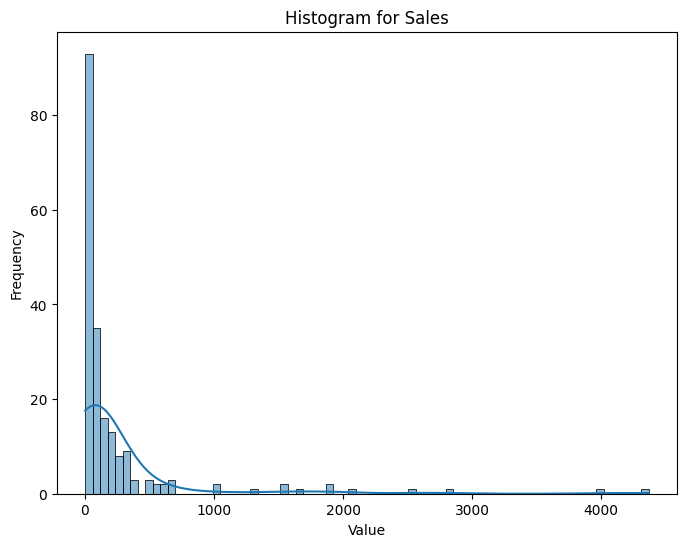

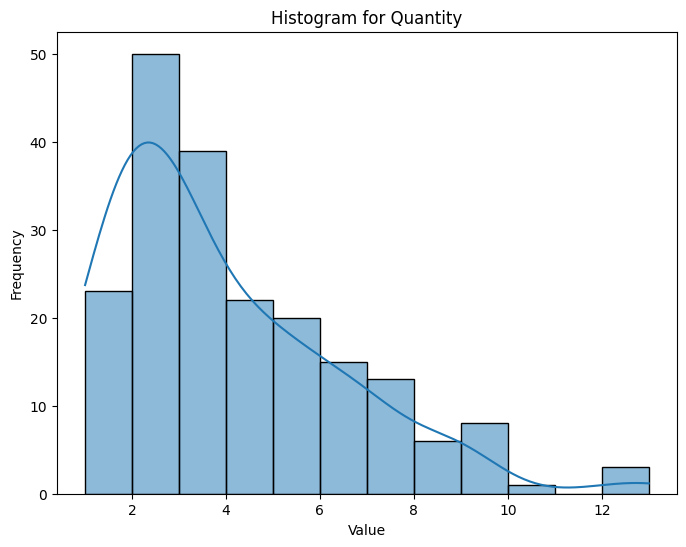

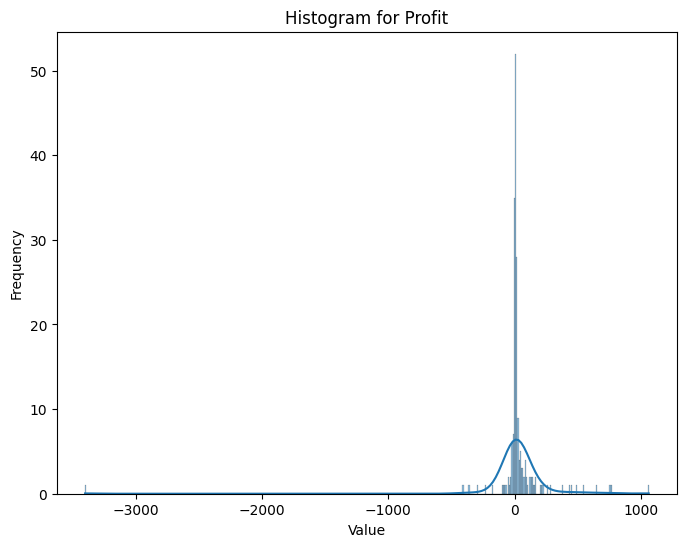

In [32]:
# print histogram for Sales
plot_histogram(df_super_store, 'Sales')

# print histogram for Quantity
plot_histogram(df_super_store, 'Quantity')

# print histogram for Profit
plot_histogram(df_super_store, 'Profit')

### 2.5 Handling missing values in the dataset: Identify methods for cleaning the dataset.


#### 2.5.1 discover the null

In [33]:
df_super_store.isnull().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

In [34]:
df_super_store.isna().sum()

Row ID            0
Order ID          1
Order Date        2
Ship Date         3
Ship Mode         4
Customer ID       0
Customer Name     3
Segment           3
Country           4
City              2
State             4
Postal Code       3
Region            3
Product ID        2
Category          2
Sub-Category      4
Product Name      3
Sales             1
Quantity          5
Discount          3
Profit           11
dtype: int64

I decided to remove all nulls due to the number of nulls compared to the total number of records being so small.
in other situations, I could use it to fill null with Mean median, mode, or interpolation. the biggest number of null values in **"Profit"** 11 records that represent 11/9993 ~ 0.11 %, not even 1% so I can remove null and data will not be affected

In [35]:
df_super_store.dropna(inplace=True)

In [36]:
df_super_store.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [37]:
df_super_store.isna().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.2 Remove unimportant columns
some columns is not important and no need to use it in Building the LM
for example 'Row ID'
also it is possible that remove either customer id, or customer name because each of them represent the same  
for now I will remove RowID and later I will decide to remove more column or merge column customer name and id

In [38]:
del df_super_store['Row ID']

#### 2.5.3 discover the values that expected to be number like Quantity, Sales, Profit

##### 2.5.3.1 Convert Quantity to numberic

In [39]:
df_super_store['Quantity'].unique()


array(['5', '4', '8', 'Two', '6', '7', '3', 'Seven', '9', '12', '2',
       'ten', '10', '7?', '1', '14', '13', '11'], dtype=object)

In [40]:
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Two', 2)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('Seven', 7)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('ten', 10)
df_super_store['Quantity'] = df_super_store['Quantity'].replace('7?', 7)


df_super_store['Quantity'] = pd.to_numeric(df_super_store['Quantity'], errors='raise')


#### 2.5.4 create method to check the values of a column in dataframe that not numberic

In [41]:
def check_non_numeric_values(dataframe, column_name):
    non_numeric_values = dataframe.loc[~dataframe[column_name].astype(str).str.match(r'^-?[0-9.]+$', na=False), column_name]
    return non_numeric_values


In [42]:
df_super_store['Quantity'].unique()


array([ 5,  4,  8,  2,  6,  7,  3,  9, 12, 10,  1, 14, 13, 11])

In [43]:
df_super_store['Profit'].unique()


array(['-6599.978', '-3839.9904', '-3701.8928', ..., '5039.9856',
       '6719.9808', '8399.976'], dtype=object)

Check which values are not numeric in Profit

In [44]:
print(check_non_numeric_values(df_super_store, 'Profit'))

5    "-2639.9912"
Name: Profit, dtype: object


In [45]:
#remove the extra double-quote and covert all values to numberic

df_super_store['Profit'] = pd.to_numeric(df_super_store['Profit'].str.strip('"').str.replace('"', ''), errors='raise')


#### 2.5.5 Check the data types after conversion

In [46]:
print(df_super_store.dtypes)

Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code       object
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


#### 2.5.6 check the NA values and clean it

In [47]:
df_super_store.isna().sum()

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

#### 2.5.6 check the description after fix the some columns

In [48]:
df_super_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9939 entries, 0 to 9993
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9939 non-null   object 
 1   Order Date     9939 non-null   object 
 2   Ship Date      9939 non-null   object 
 3   Ship Mode      9939 non-null   object 
 4   Customer ID    9939 non-null   object 
 5   Customer Name  9939 non-null   object 
 6   Segment        9939 non-null   object 
 7   Country        9939 non-null   object 
 8   City           9939 non-null   object 
 9   State          9939 non-null   object 
 10  Postal Code    9939 non-null   object 
 11  Region         9939 non-null   object 
 12  Product ID     9939 non-null   object 
 13  Category       9939 non-null   object 
 14  Sub-Category   9939 non-null   object 
 15  Product Name   9939 non-null   object 
 16  Sales          9939 non-null   float64
 17  Quantity       9939 non-null   int64  
 18  Discount

In [49]:
df_super_store.describe()

,Sales,Quantity,Discount,Profit
count,9939.000000,9939.000000,9939.000000,9939.000000
mean,226.011777,3.787101,0.154777,30.221163
std,580.428219,2.224326,0.205377,231.627602
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.140000,2.000000,0.000000,1.800550
50%,53.820000,3.000000,0.200000,8.713800
75%,208.072000,5.000000,0.200000,29.544000
max,17499.950000,14.000000,0.800000,8399.976000


### 2.4 Grouping of data: Demonstrate data aggregations or frequency distributions to summarise analysis.

In [ ]:
# Group by Segment
#group by segement to understand the classes of the customer
#the important of the segment is to understand the customer classes

result = df_super_store.groupby('Segment')[['Sales', 'Profit','Quantity','Discount','Category','Sub-Category']].count()
print(result)


             Sales  Profit  Quantity  Discount  Category  Sub-Category
Segment                                                               
%                1       1         1         1         1             1
Consumer      5157    5157      5157      5157      5157          5157
Corporate     3009    3009      3009      3009      3009          3009
Home Office   1772    1772      1772      1772      1772          1772


In [50]:
# Segment with value '%' looks like it is corrupted data so I will remove it
# it represent only one row
df_super_store = df_super_store[df_super_store['Segment']!= '%']

In [51]:
# Discover sales per Category Values
df_super_store.groupby('Category')['Sales'].sum()

Category
Frnture              4323.3840
Furniture          723624.7352
Office Supplies    709413.3960
Technology         808569.9960
Name: Sales, dtype: float64

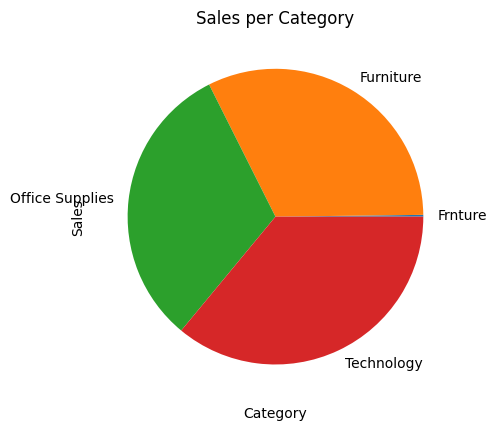

In [52]:
#Get a graph for sales per category

df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales per Category')
plt.show()


it looks like the Furniture and frniture are the same and there is misspelling in data so it need to fixed

In [53]:
# change Category value of Frnture to Furniture

df_super_store['Category'] = df_super_store['Category'].replace('Frnture', 'Furniture')


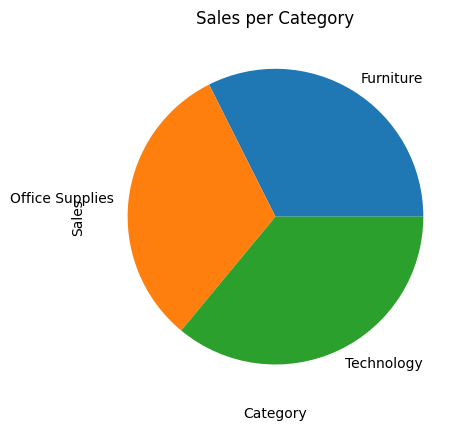

In [55]:
# check data after fix
df_super_store.groupby('Category')['Sales'].sum().plot(kind='pie')
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales per Category')
plt.show()

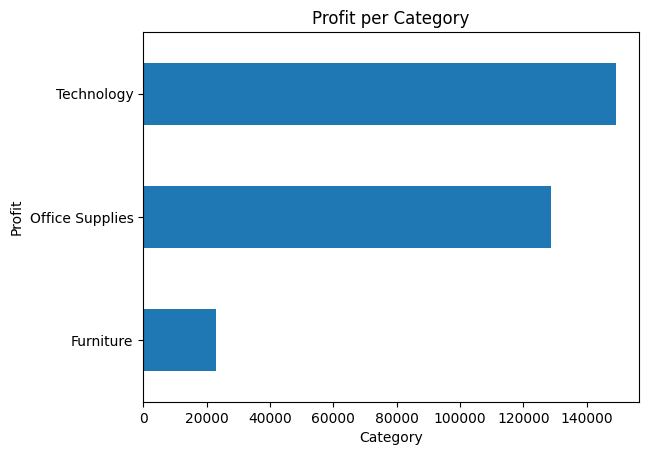

In [56]:
# profit by category
numberic_profit = df_super_store.copy()
numberic_profit['Profit'] = pd.to_numeric(df_super_store['Profit'], errors='coerce')

numberic_profit.groupby('Category')['Profit'].sum().plot(kind='barh')
plt.xlabel('Category')
plt.ylabel('Profit')
plt.title('Profit per Category')
plt.show()

`**The furniture is a lower category in terms of sales and also in terms of profit, so it may be a decision not to sell it in that category.**`

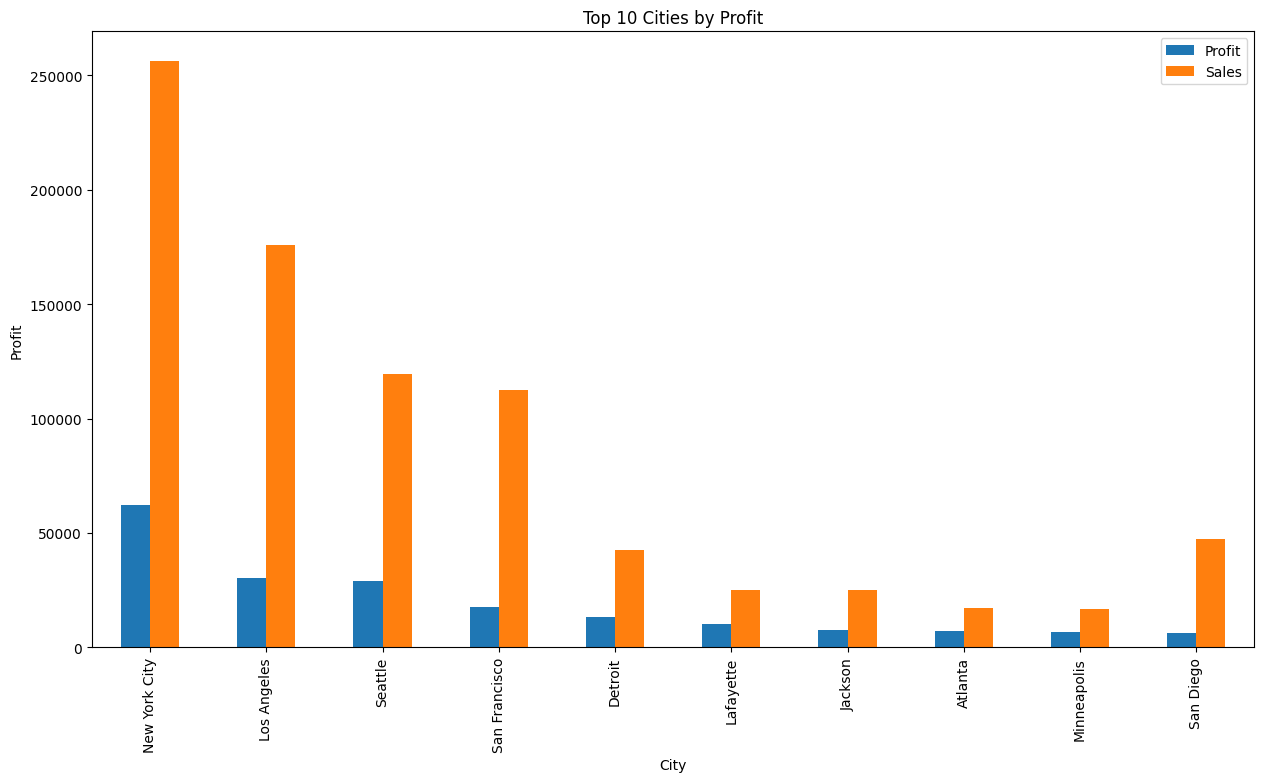

In [57]:
# get some insights about the top 10 cities in sales and profit
profit_by_city = numberic_profit.groupby('City')[['Profit', 'Sales']].sum()

# Sort the results by Profit in descending order
profit_by_city_sorted = profit_by_city.sort_values(by='Profit', ascending=False)

# Select the top 10 cities
top_10_cities = profit_by_city_sorted.head(10)

# Plot the bar chart
ax = top_10_cities.plot(kind='bar', figsize=(15, 8))
plt.xlabel('City')
plt.ylabel('Profit')
plt.title('Top 10 Cities by Profit')


plt.show()

In [58]:
# group by Country
result = df_super_store.groupby('Country')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

               Sales  Profit  Quantity  Discount
Country                                         
56                 1       1         1         1
US                 1       1         1         1
United States   9936    9936      9936      9936


In [60]:
#it looks like the country column has not benifit and could be delete
# us is the same united states and maybe 56 is wrong and it was required to be USA
del df_super_store['Country']

because all of sales inside USA then try to group by city and also segment to understand the customer discrimination

In [61]:
result = df_super_store.groupby('City')[['Sales', 'Profit','Quantity','Discount']].count()
print(result)

             Sales  Profit  Quantity  Discount
City                                          
Aberdeen         1       1         1         1
Abilene          1       1         1         1
Akron           20      20        20        20
Albuquerque     14      14        14        14
Alexandria      16      16        16        16
...            ...     ...       ...       ...
Woonsocket       4       4         4         4
Yonkers         15      15        15        15
York             5       5         5         5
Yucaipa          1       1         1         1
Yuma             4       4         4         4

[531 rows x 4 columns]


In [62]:
result = df_super_store.groupby(['City', 'Segment'])[['Sales', 'Profit', 'Quantity','Discount']].count()

# Display the grouped result
print(result)

                      Sales  Profit  Quantity  Discount
City     Segment                                       
Aberdeen Consumer         1       1         1         1
Abilene  Consumer         1       1         1         1
Akron    Consumer        12      12        12        12
         Corporate        6       6         6         6
         Home Office      2       2         2         2
...                     ...     ...       ...       ...
Yonkers  Home Office      2       2         2         2
York     Corporate        5       5         5         5
Yucaipa  Corporate        1       1         1         1
Yuma     Corporate        2       2         2         2
         Home Office      2       2         2         2

[1026 rows x 4 columns]


In [63]:
# Get count for each of product name

df_super_store.groupby('Product Name')[['Sales', 'Profit', 'Quantity','Discount']].count()


,Sales,Profit,Quantity,Discount
Product Name,,,,
"""While you Were Out"" Message Book, One Form per Page",3,3,3,3
"#10 Gummed Flap White Envelopes, 100/Box",4,4,4,4
#10 Self-Seal White Envelopes,4,4,4,4
"#10 White Business Envelopes,4 1/8 x 9 1/2",7,7,7,7
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10,10,10,10
...,...,...,...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",5,5,5,5
iOttie HLCRIO102 Car Mount,5,5,5,5
iOttie XL Car Mount,2,2,2,2


from matplotlib import pyplot as plt
_df_0['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Profit'].plot(kind='hist', bins=20, title='Profit')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Discount'].plot(kind='hist', bins=20, title='Discount')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Sales', y='Profit', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Profit', y='Quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='Quantity', y='Discount', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Profit'].plot(kind='line', figsize=(8, 4), title='Profit')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Quantity'].plot(kind='line', figsize=(8, 4), title='Quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Discount'].plot(kind='line', figsize=(8, 4), title='Discount')
plt.gca().spines[['top', 'right']].set_visible(False)

**This can lead having 5~10 big cities in terms of numbers like New Youk, LA, Philadelphia, San Francisco**

In [ ]:
# Discover Segment Values
df_super_store.groupby('Segment')[['Sales', 'Profit', 'Quantity','Discount']].count()

,Sales,Profit,Quantity,Discount
Segment,,,,
Consumer,5157,5157,5157,5157
Corporate,3009,3009,3009,3009
Home Office,1772,1772,1772,1772


In [ ]:
!pip install plotly


In [ ]:
import plotly.express as px

# get some insights for category and segment

result = df_super_store.groupby(['City', 'Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['City', 'Segment'], values='Count', title='Count by City and Segment')
fig.show()


from the data I noticed that there is record with value not correct and it is only one record so I will remove it
the row as following

Segment = '%' looks like not correct values so I will remove it

In [ ]:
# get some insights for category and segment
result = df_super_store.groupby(['Category','Segment']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['Category', 'Segment'], values='Count', title='Count by Category and Segment')
fig.show()

In [ ]:
# get some insights for category and segment
result = df_super_store.groupby(['Segment','Product Name']).size().reset_index(name='Count')

# Plotting the treemap
fig = px.treemap(result, path=['Segment','Product Name'], values='Count', title='Count by Category and Segment')
fig.show()

In [ ]:
# Discover Sub-Category Values
df_super_store.groupby(['Category','Sub-Category']).sum()

<ipython-input-39-df068bc424b8>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



Sales  Quantity  Discount      Profit
Category        Sub-Category                                             
Frnture         Tables          4323.3840        28      1.20  -1741.6017
Furniture       Bookcases     112386.1677       851     47.03  -2872.6610
                Chairs        326901.1600      2343    104.10  26709.6704
                Furnishings    91600.9720      3554    131.20  13172.9484
                Tables        192736.4355      1165     77.60 -12191.7051
Office Supplies Appliances    107403.6850      1716     75.20  18475.8830
                Art            27118.7920      3000     59.60   6527.7870
                Binders       197411.7690      5922    559.40  35770.1427
                Envelopes      16473.1380       904     20.20   6963.0751
                Fasteners       3024.2800       914     17.80    949.5182
                Labels         12411.1320      1394     25.00   5510.9194
                Paper          78479.2060      5178    102.60  34053.5693
                Storage       220603.2320      3125     61.80  21708.6570
                Supplies       46488.1620       645     14.40  -1154.3415
Technology      Accessories   167380.3180      2976     60.80  41936.6357
                Copiers       149528.0300       234     11.00  55617.8249
                Machines      166020.6200       427     33.30   6007.1787
                Phones        325641.0280      3260    135.40  45483.9921

In [ ]:
n_by_category_subcategory = df_super_store.groupby(['Category', 'Sub-Category'])['Profit'].sum()
print (n_by_category_subcategory)


Category         Sub-Category
Frnture          Tables          -1741.6017
Furniture        Bookcases       -2872.6610
                 Chairs          26709.6704
                 Furnishings     13172.9484
                 Tables         -12191.7051
Office Supplies  Appliances      18475.8830
                 Art              6527.7870
                 Binders         35770.1427
                 Envelopes        6963.0751
                 Fasteners         949.5182
                 Labels           5510.9194
                 Paper           34053.5693
                 Storage         21708.6570
                 Supplies        -1154.3415
Technology       Accessories     41936.6357
                 Copiers         55617.8249
                 Machines         6007.1787
                 Phones          45483.9921
Name: Profit, dtype: float64


In [ ]:
#group by ship mode with respect to profit and sales

df_super_store.groupby('Ship Mode')[['Sales', 'Profit', 'Quantity','Discount']].count()

,Sales,Profit,Quantity,Discount
Ship Mode,,,,
First Class,1531,1531,1531,1531
Same Day,542,542,542,542
Second Class,1936,1936,1936,1936
Standard Class,5930,5930,5930,5930


### 2.3 Normalising and scaling (numerical variables): Apply normalisation and scaling methods to transform data for further analysis.

In [ ]:

# Select only numeric columns for scaling
numeric_cols = df_super_store.select_dtypes(include=['number']).columns
df_numeric = df_super_store[numeric_cols]

# Normalising and scaling using Min-Max Scaling
scaler_minmax = MinMaxScaler()
df_minmax = pd.DataFrame(scaler_minmax.fit_transform(df_numeric), columns=df_numeric.columns)

# Normalising and scaling using  Z-score Standardization
scaler_standard = StandardScaler()
df_standard = pd.DataFrame(scaler_standard.fit_transform(df_numeric), columns=df_numeric.columns)

print(df_minmax)
print(df_standard)


         Sales  Quantity  Discount    Profit
0     0.257124  0.307692     0.875  0.000000
1     0.457129  0.230769     0.625  0.184000
2     0.124412  0.538462     1.000  0.193206
3     0.145692  0.307692     0.875  0.213334
4     0.107977  0.307692     1.000  0.244700
...        ...       ...       ...       ...
9934  0.539987  0.307692     0.000  0.748699
9935  0.565290  0.923077     0.000  0.769759
9936  0.599990  0.153846     0.000  0.776000
9937  0.799995  0.230769     0.000  0.888000
9938  1.000000  0.307692     0.000  1.000000

[9939 rows x 4 columns]
          Sales  Quantity  Discount     Profit
0      7.363853  0.545316  2.654876 -28.625832
1     13.394179  0.095719  1.681008 -16.709607
2      3.362466  1.894107  3.141810 -16.113372
3      4.004096  0.545316  2.654876 -14.809866
4      2.866956  0.545316  3.141810 -12.778505
...         ...       ...       ...        ...
9934  15.892408  0.545316 -0.753663  19.861561
9935  16.655315  4.142092 -0.753663  21.225433
9936  17.701

### 2.2 Outlier treatment: Identify abnormal or problematic values and apply methods to treat them.

In [ ]:
def clean_outliers_inplace(df, column_name):
    # Display the original number of rows
    original_rows = len(df)
    print(f"Number of rows before outlier removal: {original_rows}")

    # Create a boxplot to visualize the data
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot of the Original Dataset")
    plt.show()

    # Identify and treat outliers using the boxplot
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    # Define the upper and lower bounds for outliers
    lower_bound = Q1 - 10 * IQR
    upper_bound = Q3 + 10 * IQR

    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]

    # Remove outliers in the original DataFrame
    df.drop(outliers.index, inplace=True)

    # Reset the index of the original DataFrame
    df.reset_index(drop=True, inplace=True)

    # Display the number of rows after outlier removal
    cleaned_rows = len(df)
    print(f"Number of rows after outlier removal: {cleaned_rows}")

    # Calculate and display the percentage of removal
    percentage_removed = ((original_rows - cleaned_rows) / original_rows) * 100
    print(f"Percentage of removal: {percentage_removed:.2f}%")

    # Create a boxplot of the dataset after outlier treatment
    plt.figure(figsize=(8, 6))
    sns.boxplot(df[column_name])
    plt.title("Boxplot After Outlier Treatment")
    plt.show()


Number of rows before outlier removal: 9939


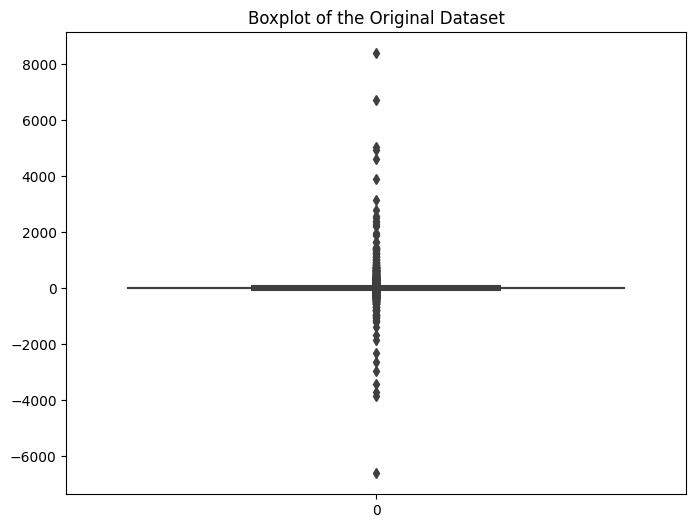

Number of rows after outlier removal: 9595
Percentage of removal: 3.46%


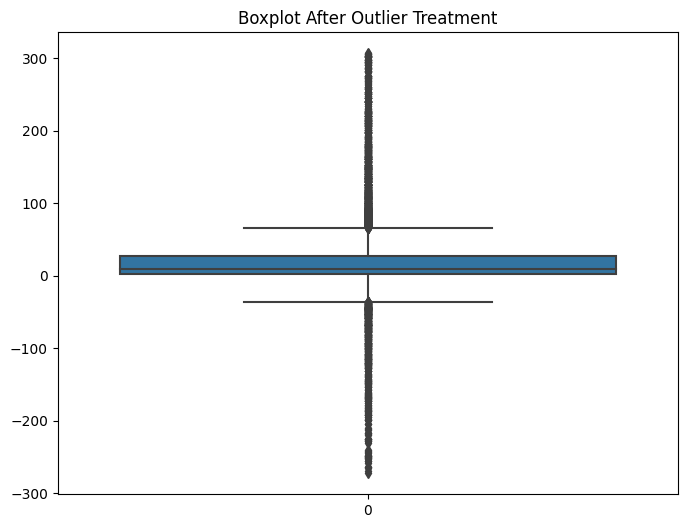

In [ ]:
clean_outliers_inplace(df_super_store, 'Profit')

Number of rows before outlier removal: 9595


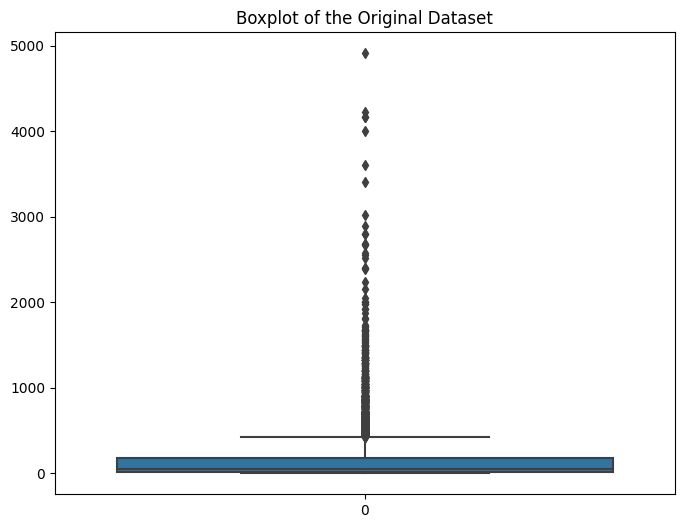

Number of rows after outlier removal: 9564
Percentage of removal: 0.32%


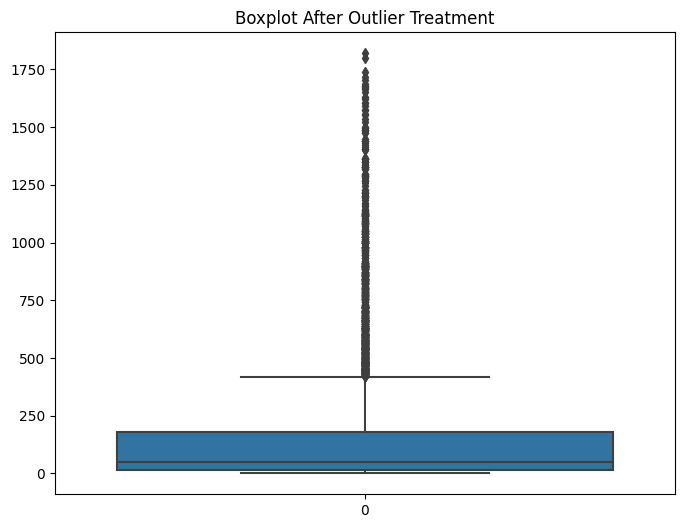

In [ ]:
clean_outliers_inplace(df_super_store, 'Sales')


Number of rows before outlier removal: 9564


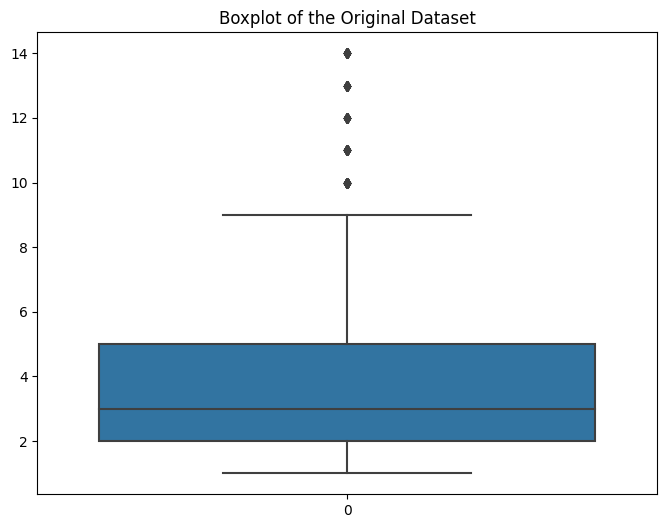

Number of rows after outlier removal: 9564
Percentage of removal: 0.00%


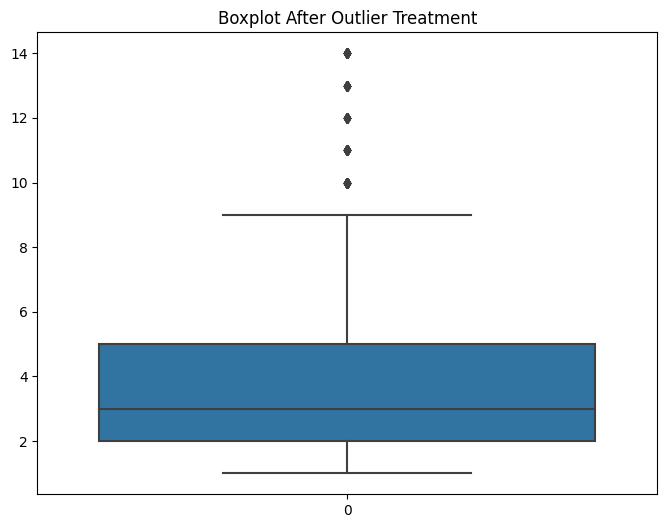

In [ ]:
clean_outliers_inplace(df_super_store, 'Quantity')

Number of rows before outlier removal: 9564


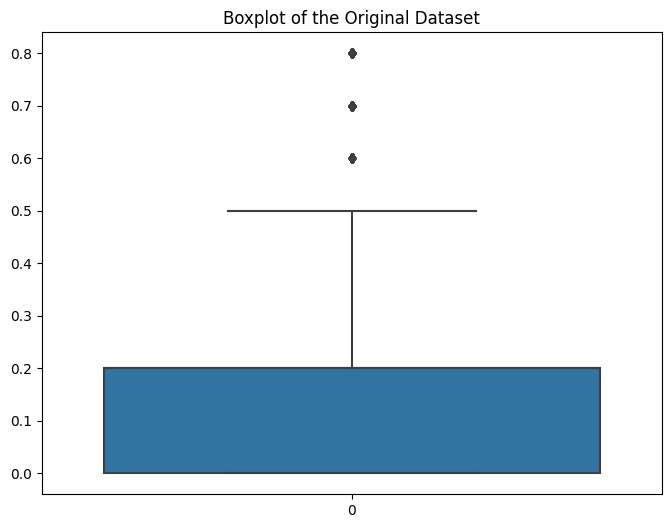

Number of rows after outlier removal: 9564
Percentage of removal: 0.00%


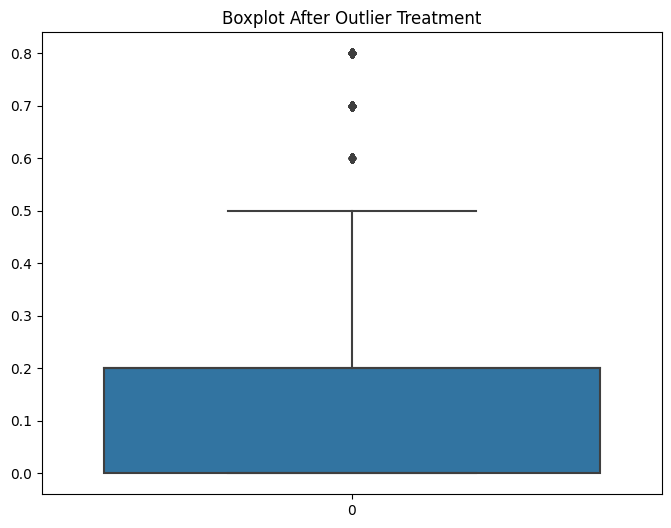

In [ ]:
clean_outliers_inplace(df_super_store, 'Discount')

###2.6 Correlation: Describe features that are related and the nature of that relationship.

In [ ]:
df_super_store.sample(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7505,CA-2016-125738,15/10/2016,21/10/2016,Standard Class,PB-18805,Patrick Bzostek,Home Office,Salt Lake City,Utah,84106,West,OFF-PA-10001509,Office Supplies,Paper,"Recycled Desk Saver Line ""While You Were Out"" ...",71.60,8,0.0,32.9360
2154,CA-2014-145576,14/09/2014,18/09/2014,Second Class,CA-12775,Cynthia Arntzen,Consumer,Tampa,Florida,33614,South,OFF-AP-10003914,Office Supplies,Appliances,Sanitaire Vibra Groomer IR Commercial Upright ...,13.00,5,0.2,1.3000
2339,CA-2017-154466,01/01/2017,01/02/2017,First Class,DP-13390,Dennis Pardue,Home Office,Franklin,Wisconsin,53132,Central,OFF-BI-10002012,Office Supplies,Binders,Wilson Jones Easy Flow II Sheet Lifters,3.60,2,0.0,1.7280
6674,US-2015-127040,12/06/2015,12/10/2015,Standard Class,SG-20605,Speros Goranitis,Consumer,New York City,New York,10009,East,OFF-PA-10001184,Office Supplies,Paper,Xerox 1903,41.86,7,0.0,20.5114
4705,CA-2017-100230,12/11/2017,15/12/2017,Standard Class,AA-10375,Allen Armold,Consumer,New York City,New York,10035,East,OFF-PA-10002245,Office Supplies,Paper,Xerox 1895,17.94,3,0.0,8.0730


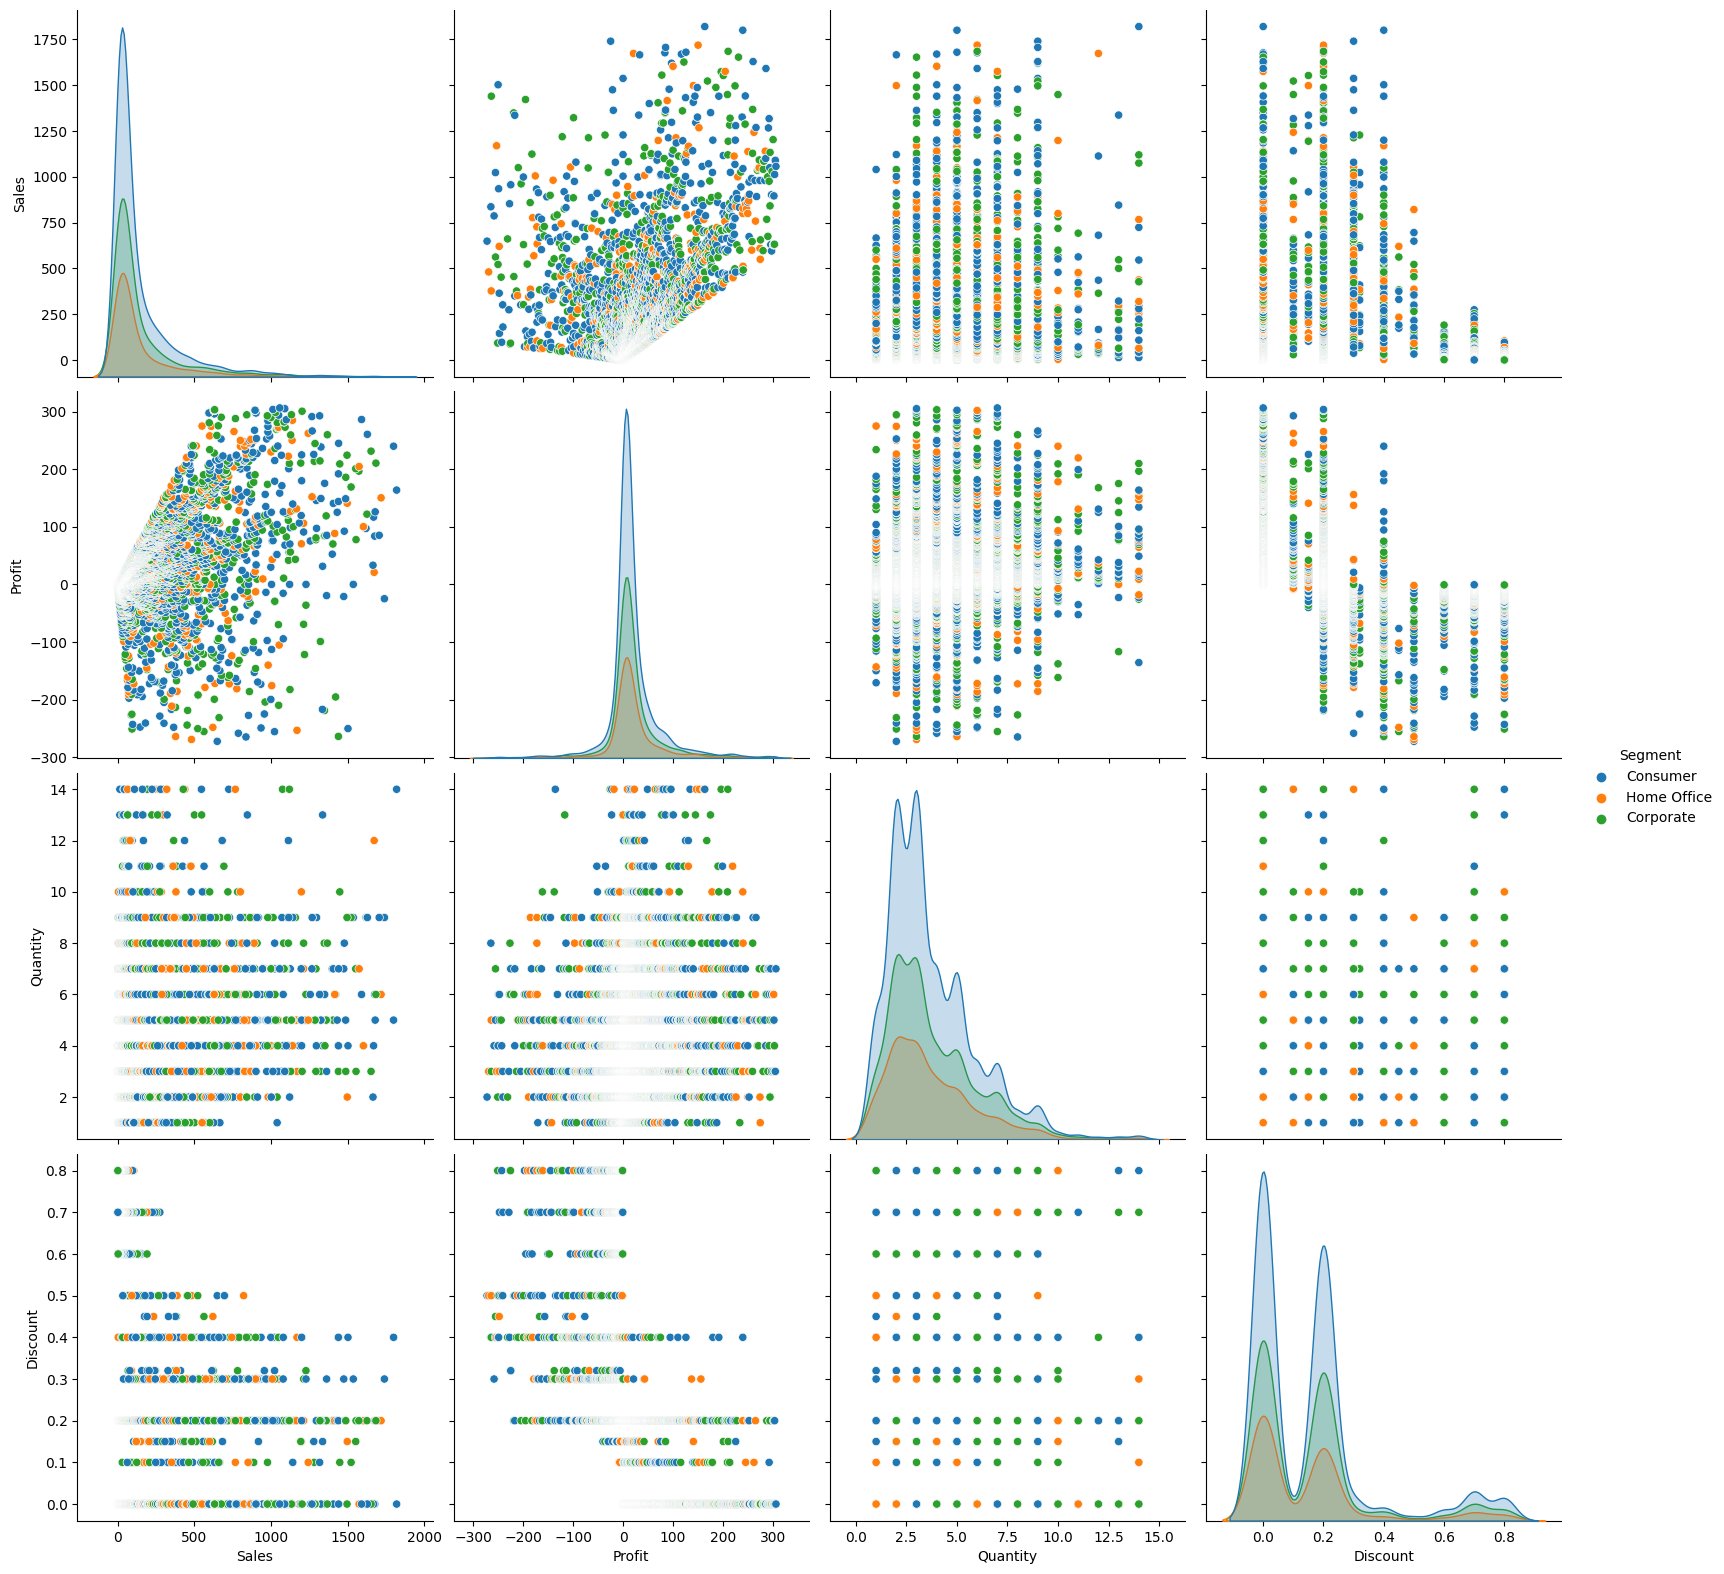

In [ ]:
sns.pairplot(df_super_store, hue='Segment', height=4, vars=['Sales', 'Profit','Quantity' ,'Discount'])

In [ ]:
correlation_matrix = df_super_store.corr()
print(correlation_matrix)

             Sales  Quantity  Discount    Profit
Sales     1.000000  0.228268 -0.060798  0.434371
Quantity  0.228268  1.000000  0.005004  0.152204
Discount -0.060798  0.005004  1.000000 -0.391168
Profit    0.434371  0.152204 -0.391168  1.000000


<ipython-input-49-aa93160ee947>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

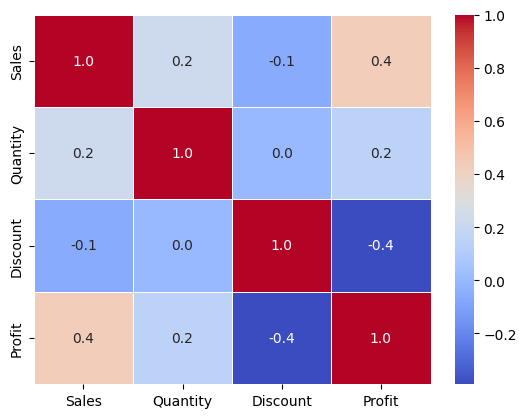

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.1f', linewidths=.5)


*there is medium correlation between sales and profit 0.6*

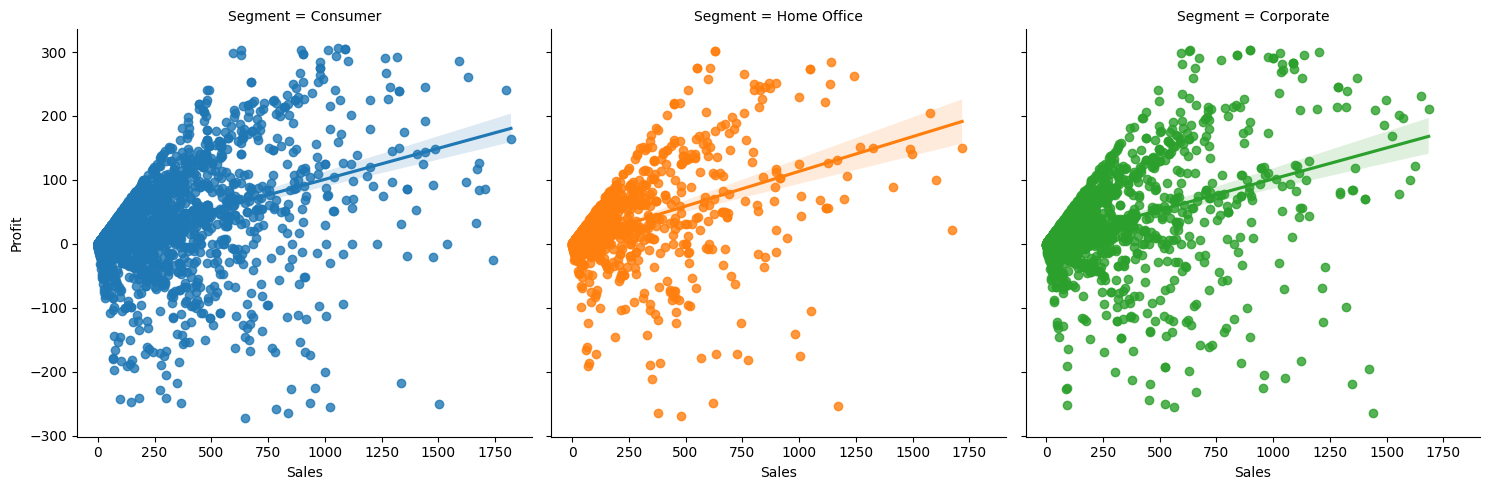

In [ ]:
sns.lmplot(data=df_super_store, hue='Segment', x='Sales', y='Profit', col='Segment', fit_reg=True, col_wrap=3)
plt.show()

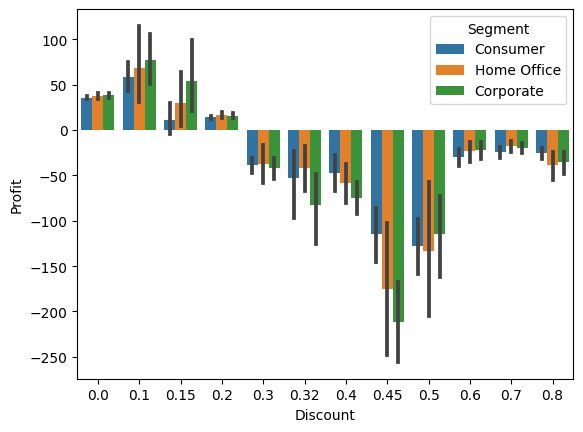

In [ ]:
# check also the relation between the discount and profit
#It make sense when the discount increase the profit decrease

sns.barplot(data=df_super_store, hue='Segment', x='Discount', y='Profit')
plt.show()

It look like there are some outliter let's study them by boxplot

array([[<Axes: title={'center': 'Discount'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Profit'}, xlabel='[Segment]'>],
       [<Axes: title={'center': 'Quantity'}, xlabel='[Segment]'>,
        <Axes: title={'center': 'Sales'}, xlabel='[Segment]'>]],
      dtype=object)

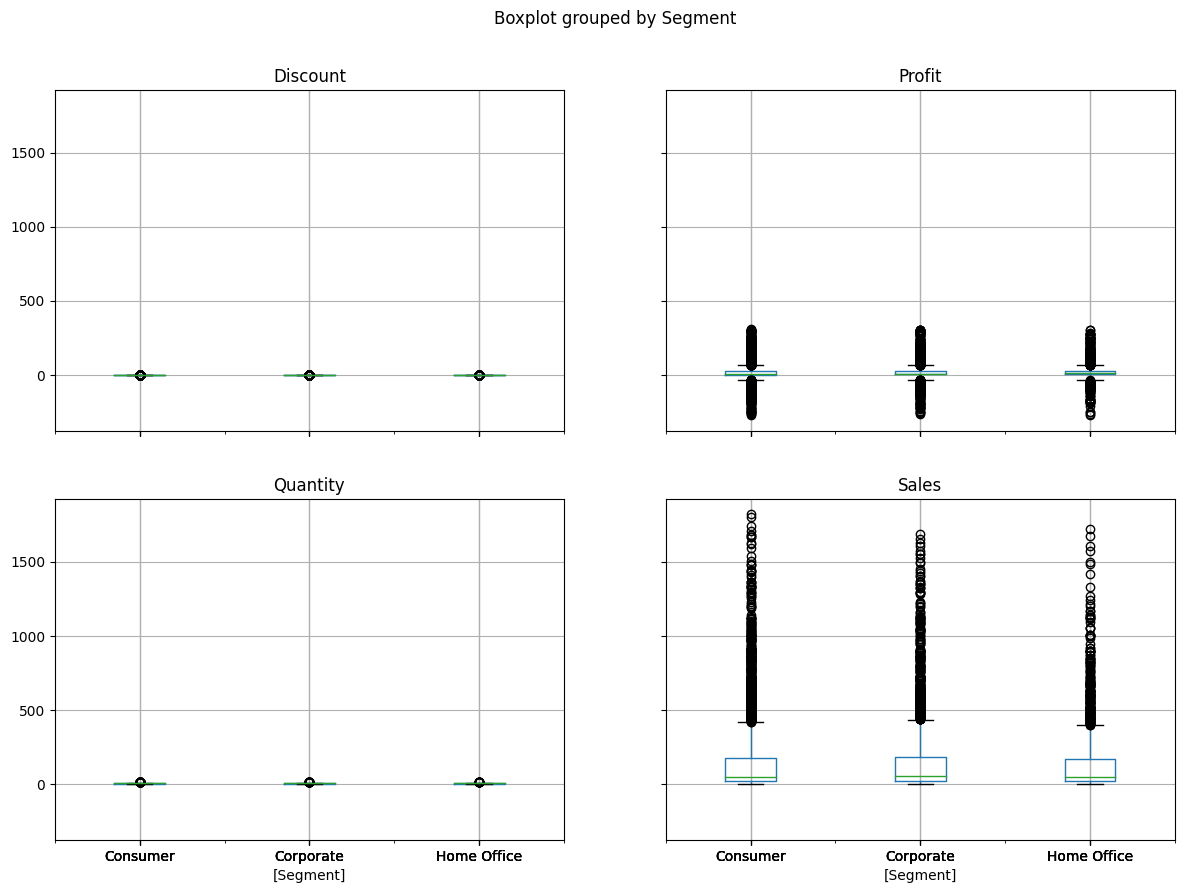

In [ ]:
df_super_store.boxplot(by='Segment', figsize=(14,10))

# Task 3:
Provide Python scripts to explain the relationships between variables and do bivariate analysis and visualisation as needed using all of the following:

#### the following method is used to create either **LogisticRegression** model or linear **LinearRegression**  and also print the accuracy of that model and return model to use it in prediction

In [ ]:
def train_and_evaluate_model(X, y, use_logistic_regression=True):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the features (optional, but can be beneficial for some algorithms)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the model based on the parameter
    if use_logistic_regression:
        model = LogisticRegression()
    else:
        model = LinearRegression()

    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    predictions = model.predict(X_test_scaled)

    # Evaluate the model
    if use_logistic_regression:
        accuracy = accuracy_score(y_test, predictions)
        classification_report_result = classification_report(y_test, predictions)

        print(f'Logistic Regression - Accuracy: {accuracy}')
        print('Classification Report:')
        print(classification_report_result)
    else:
        # For linear regression, you might want to consider different evaluation metrics
        # depending on the nature of your problem (e.g., Mean Squared Error for regression).
        # Adjust as needed for your specific use case.
        print('Linear Regression - No classification metrics available for regression models.')
    return model

### 3.1 Two categorical variables

### 3.2 Numerical vs numerical
    I want to find our date if there is relation between :
    * profit (dependent)

    And (independent):
    * Quantity
    * Sales

In [ ]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Profit']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [ ]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X,y)

LinearRegression()

In [ ]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Profit']]

,Sales,Quantity,Discount,Profit
9562,1089.75,3,0.0,305.1300
9563,1056.86,7,0.0,306.4894


In [ ]:
linreg.predict([[447.944 ,	7 ,	0.2]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([[46.57064754]])

### 3.3 Categorical vs numerical
    I want to find our date if there is relation between :
    * Sgement (dependent)

    And (independent):
    * Quantity
    * Sales
    * Discount




In [ ]:
df_super_store_independent = df_super_store[['Sales','Quantity','Discount']]
df_super_store_dependent = df_super_store[['Segment']]

X = df_super_store_independent
y = df_super_store_dependent

# y = coef2 * sales + coef2 * quantity + coef3* Discount + e

In [ ]:
# Train and evaluate logistic regression
model= train_and_evaluate_model(X, y, use_logistic_regression=True)


Logistic Regression - Accuracy: 0.5117616309461579
Classification Report:
              precision    recall  f1-score   support

    Consumer       0.51      1.00      0.68       979
   Corporate       0.00      0.00      0.00       603
 Home Office       0.00      0.00      0.00       331

    accuracy                           0.51      1913
   macro avg       0.17      0.33      0.23      1913
weighted avg       0.26      0.51      0.35      1913



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this be

In [ ]:
df_super_store.tail(2)[['Sales','Quantity','Discount','Segment']]

,Sales,Quantity,Discount,Segment
9562,1089.75,3,0.0,Consumer
9563,1056.86,7,0.0,Consumer


In [ ]:
model.predict([[1056.86 ,	3 ,	0]])

array(['Corporate'], dtype=object)